The initial centroids are: 
[[16.00225106 10.2143462 ]
 [17.95547218 14.77471014]
 [15.24970695 16.19125657]
 [ 4.58928511 17.26119779]]
The final centriods are: 
[[14.68575864 10.84800744]
 [18.38742822 11.40957343]
 [15.58710761 15.16340679]
 [ 6.08213677 12.87332739]]
After 50 times iteration, the SSE of K-means is 655.9185717381779


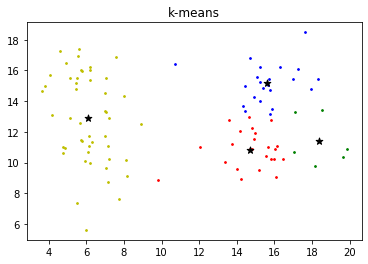

In [91]:
##############################################
#      Answer1:implements of k-means
#the analyse will be writen in below
##############################################

# -*- coding: utf-8 -*-
"""
Created on Mon Nov 21 21:14:00 2021

@author: MJY
"""
import numpy as np
import matplotlib.pyplot as plt

#generate data
def data_generate():
    N = 100
    mean1 = [6, 15]
    mean2 = [6, 11]
    mean3 = [16,15]
    mean4 = [16,11]
    cov = [[2, 0], [0, 2]]
    np.random.seed(50)
    X = np.random.multivariate_normal( mean1, cov, int(N/4))
    X = np.concatenate ((X, np.random.multivariate_normal ( mean2, cov, int(N/4))))
    X = np.concatenate ((X, np.random.multivariate_normal ( mean3, cov, int(N/4))))
    X = np.concatenate ((X, np.random.multivariate_normal ( mean4, cov, int(N/4))))
    return X

# calculate Euclidean distance
def euclDistance(vector1, vector2):
	return np.sqrt(sum(np.power(vector2 - vector1, 2)))

# the mean of data
def means(arr):
    return np.array([np.mean([e[0] for e in arr]), np.mean([e[1] for e in arr])])

def process_Kmeans(K, iterate):
    data = data_generate()

    # init centroid and cluster
    np.random.seed(None)
    r = np.random.randint(data.__len__(), size =4)
    centroids = np.array([data[r[3]]])
    cla_arr = [[]]
    for i in range(K-1):
        centroids = np.concatenate([centroids, np.array([data[r[i]]])])
        cla_arr.append([])
    print("The initial centroids are: ")
    print(str(centroids))
    #cluster iteration
    cla_temp = cla_arr
    for i in range(iterate):
        # stores which cluster this sample belongs to
        for e in data:    
            # assum is nearest by first centeroid
            minIndex = 0        
            min_dis = euclDistance(e, centroids[minIndex])
            for j in range(1, centroids.__len__()):
                # find nearer centroids
                if euclDistance(e, centroids[j]) < min_dis:    
                    min_dis = euclDistance(e, centroids[j])
                    minIndex = j
            cla_temp[minIndex].append(e)
        # update centroids
        for k in range(centroids.__len__()):
            if iterate - 1 == i:
                break
            centroids[k] = means(cla_temp[k])
            cla_temp[k] = []
      
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    
    sse = 0.0
    for cluster in range(K):
        temp = 0.0
        clu_arr = np.array(cla_temp[cluster])
        for element in range(len(clu_arr)):
            temp += np.power(euclDistance(clu_arr[element], centroids[cluster]), 2)
        sse += temp
        plt.scatter(clu_arr[:,0],clu_arr[:,1], color=colors[cluster], s=3)
    print("The final centriods are: ")
    print(str(centroids))
    print("After "+ str(iterate) +" times iteration, the SSE of K-means is "+ str(sse))   
    
    #plot
    plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=50, color='black') 
    plt.title('k-means')
    plt.show()
    
process_Kmeans(4, 50)

The initial centroids are: 
[[ 7.13870926  8.75439172]
 [16.28308523 16.19997305]
 [14.17404499 12.05345519]
 [ 9.8258083   8.89085815]]
The final centriods are: 
[[ 5.89033847 15.38280186]
 [15.99544369 14.95246993]
 [15.4552341  10.85962903]
 [ 6.60786888 10.34549779]]
After 50 times iteration, the SSE of K-means is 388.9317028505506


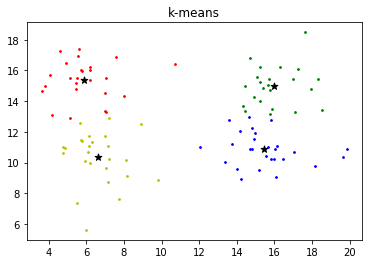

In [92]:
process_Kmeans(4, 50)

The initial centroids are: 
[[ 7.03028695 13.29349446]
 [ 6.31430008 11.3561182 ]
 [15.80674868 12.77126606]
 [ 4.7416776  11.00744971]]
The final centriods are: 
[[ 5.90248138 15.80365325]
 [ 6.146048   11.62249674]
 [15.70373051 12.74233584]
 [ 7.42950833  8.40729269]]
After 50 times iteration, the SSE of K-means is 537.5923385808433


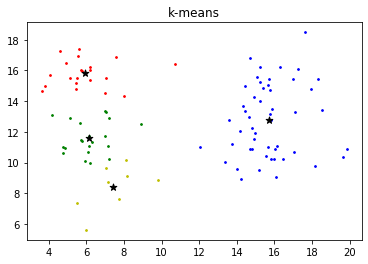

In [93]:
process_Kmeans(4,50)

answer1:  the disadvantage of k-means:
       a.Sensitive to outliers and noise points. For example, if you manually add a noise point far away from the center, the center position will be pulled far away.
       b.The choice of k value is difficult to determine.
       c.Only globular clusters can be found. In k-means, we use a single point to model the cluster. This actually assumes that the data of each cluster is distributed in a high-dimensional sphere, but the probability of this situation in life is not high. For example, each cluster is a long strip, and k-means does not recognize this category at all. In fact, k-means is doing convex optimization, so it cannot handle non-convex distributions.
       d.If the two categories are relatively close, the effect of k-means will not be very good.
       e.The initial value has a great influence on the result, and the clustering result may be different each time.
       f.The result may only be a local optimal rather than a global optimal.
       the advantage of k-means:
       a.The principle is simple and the convergence speed is fast
       b.When tuning parameters, only one parameter needs to be changed.
       c.The principle of the algorithm is simple and the interpretability is good
       Thus, its effect is mainly depends on the initial centriods.It is also beneficial to the clusters of which two distance is far. 

The initial centroid is: 
[[17.10868606 13.28022112]
 [ 3.64342216 14.69029458]
 [ 5.95600244  5.61200136]
 [17.6445363  18.48514868]]
The final centriods are: 
[[15.4552341  10.85962903]
 [ 5.89033847 15.38280186]
 [ 6.60786888 10.34549779]
 [15.99544369 14.95246993]]
After 50 times iteration, the SSE of K-means++ is 388.93170285055066


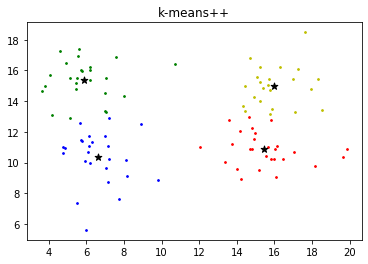

In [94]:
#########################################
#           Answer2
#the analyse will be writen in below
#########################################
# -*- coding: utf-8 -*-
"""
Created on Mon Nov 22 00:14:00 2021

@author: MJY
"""
import numpy as np
import matplotlib.pyplot as plt

#generate data
def data_generate():
    N = 100
    mean1 = [6, 15]
    mean2 = [6, 11]
    mean3 = [16,15]
    mean4 = [16,11]
    cov = [[2, 0], [0, 2]]
    np.random.seed(50)
    X = np.random.multivariate_normal( mean1, cov, int(N/4))
    X = np.concatenate ((X, np.random.multivariate_normal ( mean2, cov, int(N/4))))
    X = np.concatenate ((X, np.random.multivariate_normal ( mean3, cov, int(N/4))))
    X = np.concatenate ((X, np.random.multivariate_normal ( mean4, cov, int(N/4))))
    return X

# calculate Euclidean distance
def euclDistance(vector1, vector2):
	return np.sqrt(sum(np.power(vector2 - vector1, 2)))

# find the furthest point to a to initial centroid
def furthest(k_arr, arr):
    fur_point = [0, 0]
    max_dis = 0
    for e in arr:
        distance = 0
        for i in range(k_arr.__len__()):
            distance = distance + np.sqrt(euclDistance(k_arr[i], e))
        if distance > max_dis:
            max_dis = distance
            fur_point = e
    return fur_point

# the mean of data
def means(arr):
    return np.array([np.mean([e[0] for e in arr]), np.mean([e[1] for e in arr])])

def process_kmeans_plusplus(K, iterate):
    data = data_generate()

    # init centroid and cluster
    np.random.seed(None)
    r = np.random.randint(data.__len__() - 1)
    centroids = np.array([data[r]])
    cla_arr = [[]]
    for i in range(K-1):
        k = furthest(centroids, data)
        centroids = np.concatenate([centroids, np.array([k])])
        cla_arr.append([])
    print("The initial centroid is: ")
    print(str(centroids))

    #cluster iteration
    cla_temp = cla_arr
    for i in range(iterate):
        # stores which cluster this sample belongs to
        for e in data:    
            # assum is nearest by first centeroid
            minIndex = 0        
            min_dis = euclDistance(e, centroids[minIndex])
            for j in range(1, centroids.__len__()):
                # find nearer centroids
                if euclDistance(e, centroids[j]) < min_dis:    
                    min_dis = euclDistance(e, centroids[j])
                    minIndex = j
            cla_temp[minIndex].append(e)
        # update centroids
        for k in range(centroids.__len__()):
            if iterate - 1 == i:
                break
            centroids[k] = means(cla_temp[k])
            cla_temp[k] = []
      
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    sse = 0.0
    for cluster in range(K):
        temp = 0.0
        clu_arr = np.array(cla_temp[cluster])
        for element in range(len(clu_arr)):
            temp += np.power(euclDistance(clu_arr[element], centroids[cluster]), 2)
        sse += temp
        
        plt.scatter(clu_arr[:,0], clu_arr[:,1], color = colors[cluster], s=3)
    print("The final centriods are: ") 
    print(str(centroids))
    print("After "+ str(iterate) +" times iteration, the SSE of K-means++ is "+ str(sse))

    
    #plot
    plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=50, color='black') 
    plt.title('k-means++')
    plt.show()
    
process_kmeans_plusplus(4, 50)

The initial centroid is: 
[[ 5.55493217 16.94211285]
 [19.64794713 10.39251506]
 [ 5.95600244  5.61200136]
 [17.6445363  18.48514868]]
The final centriods are: 
[[ 5.89033847 15.38280186]
 [15.4552341  10.85962903]
 [ 6.60786888 10.34549779]
 [15.99544369 14.95246993]]
After 50 times iteration, the SSE of K-means++ is 388.93170285055066


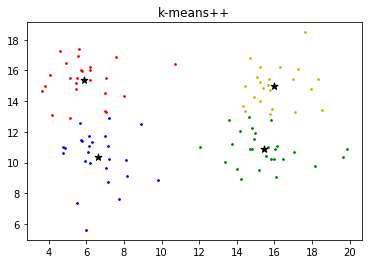

In [95]:
process_kmeans_plusplus(4, 50)

The initial centroid is: 
[[ 5.71850123 11.49558391]
 [19.83555137 10.88984678]
 [17.6445363  18.48514868]
 [ 5.95600244  5.61200136]]
The final centriods are: 
[[ 5.89033847 15.38280186]
 [15.4552341  10.85962903]
 [15.99544369 14.95246993]
 [ 6.60786888 10.34549779]]
After 50 times iteration, the SSE of K-means++ is 388.93170285055066


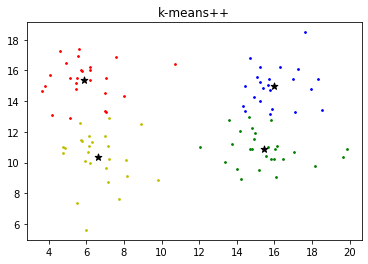

In [96]:
process_kmeans_plusplus(4, 50)

answer2: K-means++ can significantly improve the final error of the classification results. Although it takes extra time to calculate the initial point, k-mean itself can converge quickly in the iterative process, so the algorithm actually reduces the calculation time.

The initial centroids are: 
[[ 5.78819799 15.97624112]
 [ 7.99679335 14.32579894]
 [ 5.49249754 15.535319  ]
 [15.8793125  13.5055447 ]]
The final centriods are: 
[[ 5.78819799 15.97624112]
 [ 7.99679335 14.32579894]
 [ 5.49249754 15.535319  ]
 [15.8793125  13.5055447 ]]
After 1 times iteration, the SSE of K-means is 1035.0741974116545


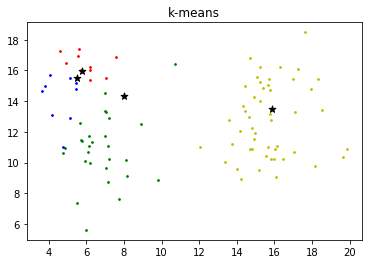

The initial centroid is: 
[[15.2128791  13.98494381]
 [ 5.95600244  5.61200136]
 [ 4.58928511 17.26119779]
 [19.83555137 10.88984678]]
The final centriods are: 
[[15.2128791  13.98494381]
 [ 5.95600244  5.61200136]
 [ 4.58928511 17.26119779]
 [19.83555137 10.88984678]]
After 1 times iteration, the SSE of K-means++ is 1197.5153465375813


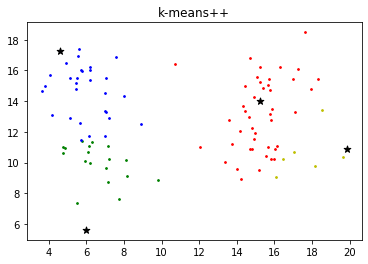

The initial centroids are: 
[[14.68417915 10.90867562]
 [15.6349223  15.06668888]
 [ 6.19447521  9.98276158]
 [14.63447667 12.93797359]]
The final centriods are: 
[[15.68005658 10.40481579]
 [15.90760611 15.32863934]
 [ 6.15853823 12.79205251]
 [14.84400254 12.84397922]]
After 2 times iteration, the SSE of K-means is 668.4399270728882


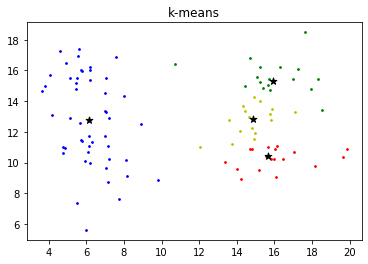

The initial centroid is: 
[[ 5.44286229 15.2094674 ]
 [19.83555137 10.88984678]
 [ 5.95600244  5.61200136]
 [17.6445363  18.48514868]]
The final centriods are: 
[[ 5.99163205 13.99027587]
 [15.59521596 11.2491157 ]
 [ 7.1619576   8.87152114]
 [15.89664527 15.39694943]]
After 2 times iteration, the SSE of K-means++ is 464.42213405149505


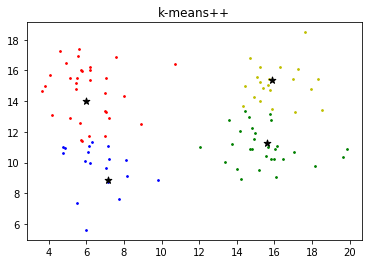

The initial centroids are: 
[[18.55696156 13.42855614]
 [14.82097835 12.25179055]
 [13.5819134  12.76035372]
 [14.89943886 14.24203585]]
The final centriods are: 
[[18.56947739 13.0392783 ]
 [15.11231289 10.87710488]
 [ 6.15853823 12.79205251]
 [15.33243246 15.16752094]]
After 3 times iteration, the SSE of K-means is 664.0057873144301


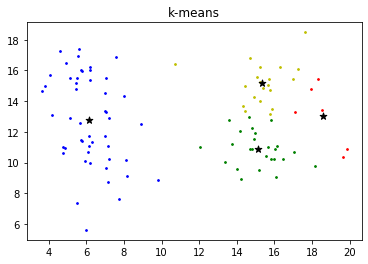

The initial centroid is: 
[[19.83555137 10.88984678]
 [ 3.64342216 14.69029458]
 [ 5.95600244  5.61200136]
 [17.6445363  18.48514868]]
The final centriods are: 
[[15.43110174 11.02611657]
 [ 6.05211127 14.65234893]
 [ 6.59931239  9.6851292 ]
 [16.08021786 15.11235294]]
After 3 times iteration, the SSE of K-means++ is 403.8245722717603


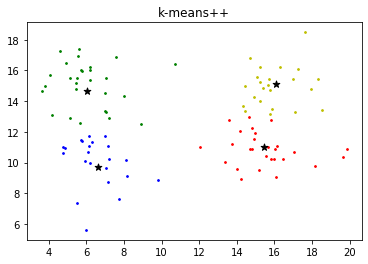

The initial centroids are: 
[[ 7.06564058 15.51401656]
 [15.6349223  15.06668888]
 [16.116103   11.09097294]
 [17.95547218 14.77471014]]
The final centriods are: 
[[ 6.15853823 12.79205251]
 [14.86893593 14.50676737]
 [15.55284092 10.61418293]
 [17.51192139 15.3930925 ]]
After 4 times iteration, the SSE of K-means is 665.9154089072289


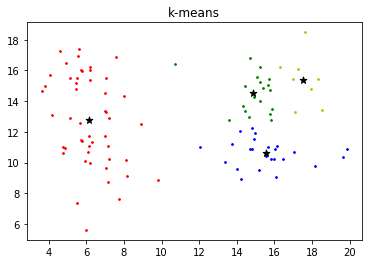

The initial centroid is: 
[[ 4.89624985 16.51358715]
 [19.64794713 10.39251506]
 [ 5.95600244  5.61200136]
 [17.6445363  18.48514868]]
The final centriods are: 
[[ 5.93049533 15.18544788]
 [15.4552341  10.85962903]
 [ 6.62312216 10.13914776]
 [15.99544369 14.95246993]]
After 4 times iteration, the SSE of K-means++ is 390.21670177027426


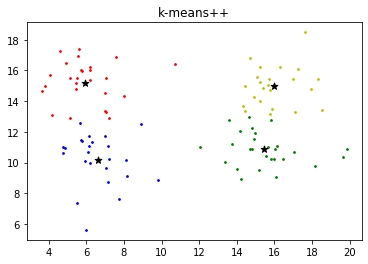

The initial centroids are: 
[[ 5.71656853 16.0508145 ]
 [ 6.1973273  15.40371465]
 [ 6.05516549 10.69839536]
 [ 5.55493217 16.94211285]]
The final centriods are: 
[[ 6.0920849  11.69148966]
 [15.77852446 12.77733901]
 [ 7.87002032  8.85281605]
 [ 5.90248138 15.80365325]]
After 5 times iteration, the SSE of K-means is 540.1986429455834


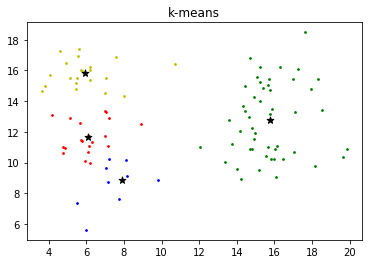

The initial centroid is: 
[[ 3.64342216 14.69029458]
 [19.83555137 10.88984678]
 [ 5.95600244  5.61200136]
 [17.6445363  18.48514868]]
The final centriods are: 
[[ 5.93049533 15.18544788]
 [15.4552341  10.85962903]
 [ 6.62312216 10.13914776]
 [15.99544369 14.95246993]]
After 5 times iteration, the SSE of K-means++ is 390.21670177027426


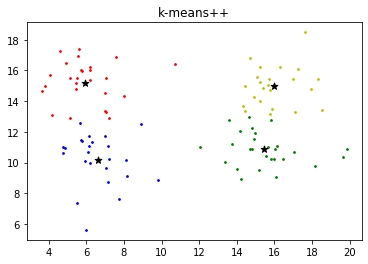

The initial centroids are: 
[[ 7.99679335 14.32579894]
 [14.44430901 14.96041077]
 [16.068074    9.03687533]
 [14.33995055 13.67799853]]
The final centriods are: 
[[ 6.15853823 12.79205251]
 [15.9371246  15.5920933 ]
 [16.03196516 10.26174923]
 [14.7729278  12.73353989]]
After 6 times iteration, the SSE of K-means is 664.3716647857849


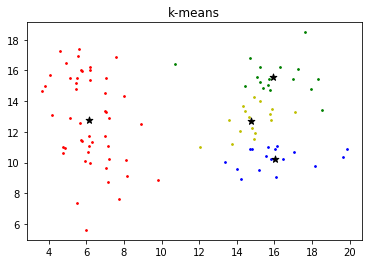

The initial centroid is: 
[[ 6.1786684  16.21932605]
 [19.64794713 10.39251506]
 [ 5.95600244  5.61200136]
 [17.6445363  18.48514868]]
The final centriods are: 
[[ 5.89033847 15.38280186]
 [15.4552341  10.85962903]
 [ 6.60786888 10.34549779]
 [15.99544369 14.95246993]]
After 6 times iteration, the SSE of K-means++ is 388.93170285055066


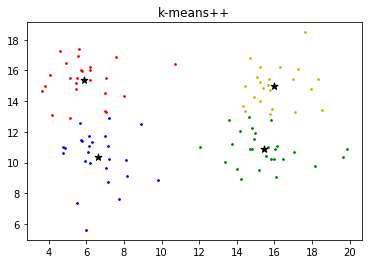

The initial centroids are: 
[[15.80674868 12.77126606]
 [15.6349223  15.06668888]
 [15.39603868 14.8285507 ]
 [ 5.71850123 11.49558391]]
The final centriods are: 
[[15.82068247 10.44799829]
 [16.43179281 15.43677988]
 [14.33787993 13.36551917]
 [ 6.15853823 12.79205251]]
After 7 times iteration, the SSE of K-means is 662.4738986715149


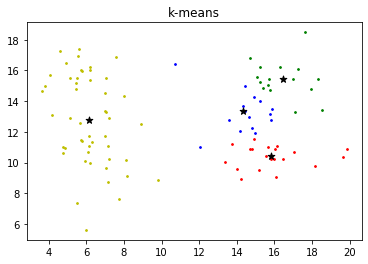

The initial centroid is: 
[[ 4.06396756 15.68791255]
 [19.83555137 10.88984678]
 [ 5.95600244  5.61200136]
 [17.6445363  18.48514868]]
The final centriods are: 
[[ 5.89033847 15.38280186]
 [15.4552341  10.85962903]
 [ 6.60786888 10.34549779]
 [15.99544369 14.95246993]]
After 7 times iteration, the SSE of K-means++ is 388.93170285055066


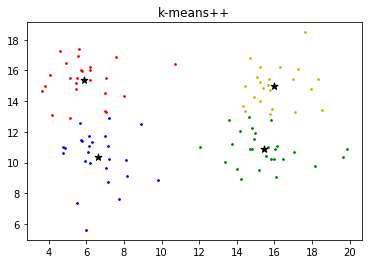

In [100]:
#######################################################
#               answer3
#######################################################
for i in range(1,8):
    process_Kmeans(4,i)
    process_kmeans_plusplus(4, i)


answer3: from the figure that we processed, we can easily found K-means++ can significantly improve the final error of the classification results, which can be compared by the SSE.Almost every times we iterated, the k-means++ all have lower SSE. Although it takes extra time to calculate the initial point, k-mean itself can converge quickly in the iterative process, so the algorithm actually reduces the calculation time. The result of K-means may only be a local optimal rather than a global optimal.And it takes about 5 times to be stable by using k-means++ instead of 6-7 times iteration by using k-means. And the effect of K-means++ is truly better than K-means in many situation. The effect of k-means depends on the initial centeriods.